# Implémentez un modèle de scoring

## Imports 

### Librairies

In [4]:
# numpy and pandas for data manipulation
!pip install numpy pandas
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import os
import numpy as np
import pandas as pd
import gc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

### Dataset

In [6]:
# List files available
print(os.listdir("/Users/macbook/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


#### Visualisation data

In [8]:
# Training data
app_train = pd.read_csv('/Users/macbook/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Testing data features
app_test = pd.read_csv('/Users/macbook/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## ML Flow config

In [11]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("projet7-credit-scoring")

<Experiment: artifact_location='/Users/macbook/mlflow_artifacts/1', creation_time=1770375002676, experiment_id='1', last_update_time=1770375002676, lifecycle_stage='active', name='projet7-credit-scoring', tags={}>

## Analyse exploratoire des données

### Examiner la distribution de la colonne cible

🎯 Variable cible

L’objectif correspond à la variable à prédire :

- **0** : le prêt a été remboursé dans les délais  
- **1** : le client a rencontré des difficultés de paiement  

Dans un premier temps, nous analysons la répartition des prêts entre ces deux catégories.


In [15]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

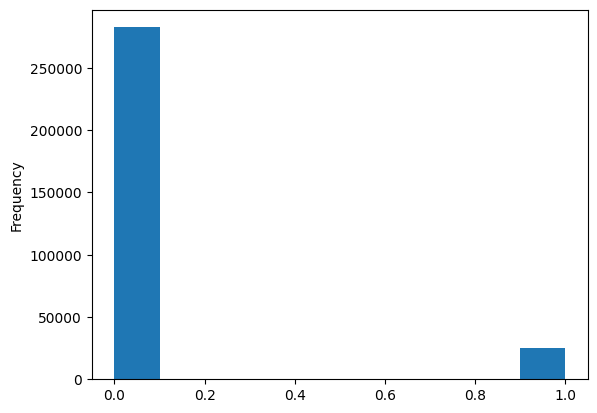

In [16]:
app_train['TARGET'].astype(int).plot.hist();

⚖️ Déséquilibre des classes

À partir de ces informations, nous constatons que le jeu de données présente un **déséquilibre des classes**.  
Les prêts remboursés dans les délais sont nettement plus nombreux que ceux ayant fait l’objet de difficultés de paiement.

Lors de l’utilisation de modèles de machine learning plus avancés, il sera possible de **pondérer les classes** en fonction de leur représentation dans les données afin de tenir compte de ce déséquilibre.


### Visualiser les valeurs manquantes

In [19]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [20]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


 🧩 Gestion des valeurs manquantes

Lors de la construction des modèles de machine learning, il sera nécessaire de **traiter les valeurs manquantes**, notamment via des techniques d’**imputation**.

Dans les étapes ultérieures, nous utiliserons également des modèles tels que **XGBoost**, capables de gérer directement les valeurs manquantes sans recourir à l’imputation.

Une autre approche consisterait à supprimer les variables présentant un taux élevé de valeurs manquantes. Cependant, il est difficile de déterminer à l’avance l’impact potentiel de ces variables sur les performances du modèle.  
Par conséquent, **toutes les colonnes sont conservées à ce stade de l’analyse**.


### Types de colonnes

In [23]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Regardons maintenant le nombre d'entrées uniques dans chacune des colonnes d'objets (catégoriques).

In [25]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement faible d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles !

#### Encoding des variables catégorielles

 🔤 Encodage des variables catégorielles

Avant d’aller plus loin, il est nécessaire de traiter les **variables catégorielles**, car la majorité des modèles de machine learning ne peuvent pas les exploiter directement (à l’exception de certains modèles comme *LightGBM*).

Ces variables doivent donc être **encodées sous forme numérique**. Deux méthodes principales existent :

1️⃣ Label Encoding
Chaque catégorie est associée à un entier.
- Aucune nouvelle colonne n’est créée
- Méthode adaptée lorsque la variable ne contient que **deux modalités**

⚠️ **Limite** : cette méthode introduit un **ordre arbitraire** entre les catégories, qui n’a pas de signification réelle et peut biaiser l’apprentissage du modèle lorsque le nombre de catégories est supérieur à deux.

2️⃣ One-Hot Encoding
Une nouvelle colonne est créée pour chaque catégorie.
- Une observation prend la valeur **1** pour sa catégorie et **0** pour les autres
- Méthode plus sûre lorsque la variable contient **plus de deux modalités**

⚠️ **Limite** : le nombre de variables peut fortement augmenter lorsque les catégories sont nombreuses, ce qui peut entraîner une explosion de la dimensionnalité. Des techniques de réduction de dimension (comme la PCA) peuvent alors être envisagées.

 🧠 Choix méthodologique
Dans ce notebook :
- Les variables catégorielles à **2 modalités** seront encodées avec le **Label Encoding**
- Les variables catégorielles à **plus de 2 modalités** seront encodées avec le **One-Hot Encoding**

Ce choix pourra évoluer au cours du projet. Aucune réduction de dimension n’est appliquée à ce stade, mais cette piste sera explorée dans des itérations futures.


##### Label Encoding and One-Hot Encoding

In [30]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'str':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [31]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


##### Alignement des données de formation et de test

🔗 Alignement des jeux de données d’entraînement et de test

Les jeux de données d’entraînement et de test doivent contenir **exactement les mêmes variables (colonnes)**.

L’application du **one-hot encoding** peut créer des colonnes supplémentaires dans le jeu d’entraînement lorsque certaines catégories ne sont pas présentes dans le jeu de test. Afin d’assurer la cohérence entre les deux jeux de données, il est donc nécessaire **d’aligner les DataFrames**.

 **Étapes suivies**
1. **Extraction de la variable cible** du jeu d’entraînement, car elle n’est pas présente dans le jeu de test mais doit être conservée.
2. **Alignement des DataFrames** sur les colonnes uniquement en spécifiant `axis = 1`, afin de garantir que les mêmes variables sont utilisées pour l’entraînement et l’évaluation du modèle.

Cette étape est essentielle pour éviter toute erreur lors de l’entraînement ou des prédictions.


In [34]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


📐 Dimensionnalité des données

Les jeux de données d’entraînement et de test disposent désormais des **mêmes variables**, condition indispensable à l’apprentissage automatique.

Cependant, le nombre de variables a **considérablement augmenté** à la suite de l’application du **one-hot encoding**.  
À terme, il sera pertinent d’envisager des techniques de **réduction de dimensionnalité**, notamment en supprimant les variables peu informatives, afin de limiter la taille des jeux de données et d’améliorer l’efficacité des modèles.

Ces approches seront explorées dans des étapes ultérieures du projet.


### Détection & Traitement des outliers

🚨 Détection des anomalies (outliers)

Lors de l’**analyse exploratoire des données (EDA)**, il est essentiel de rester attentif à la présence d’**anomalies**.  
Celles-ci peuvent provenir :
- d’erreurs de saisie,
- de dysfonctionnements des outils de mesure,
- ou correspondre à des valeurs extrêmes mais valides.

Une première approche quantitative pour identifier ces anomalies consiste à examiner les **statistiques descriptives** des variables à l’aide de la méthode `describe()`.

Dans le cas de la variable **`DAYS_BIRTH`**, les valeurs sont négatives car elles sont enregistrées par rapport à la date de la demande de prêt.  
Afin d’interpréter ces valeurs plus facilement, nous les convertissons en **années** en les multipliant par `-1` puis en les divisant par le nombre de jours dans une année.


DAYS_BIRTH

In [39]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

DAYS_EMPLOYED

In [41]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

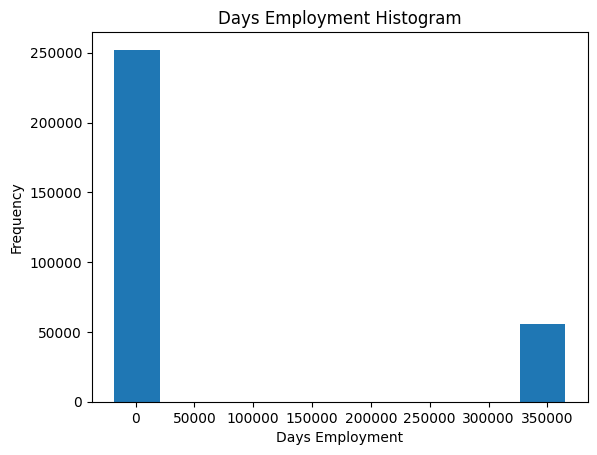

In [42]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [43]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Les prêts normaux présentent un taux de défaut de paiement de %0.2f%%' % (100 * non_anom['TARGET'].mean()))
print('Les prêts anormaux présentent un taux de défaut de paiement de %0.2f%%' % (100 * anom['TARGET'].mean()))
print('On dénombre %d de jours d emploi anormaux' % len(anom))

Les prêts normaux présentent un taux de défaut de paiement de 8.66%
Les prêts anormaux présentent un taux de défaut de paiement de 5.40%
On dénombre 55374 de jours d emploi anormaux


🧪 Gestion des anomalies

Les résultats observés sont particulièrement intéressants : **les observations considérées comme anormales présentent un taux de défaut plus faible** que le reste des données.

Il n’existe pas de règle universelle pour le traitement des anomalies, le choix dépend fortement du contexte.  
L’une des approches les plus prudentes consiste à **remplacer les valeurs anormales par des valeurs manquantes**, puis à appliquer une **imputation** avant l’entraînement des modèles.

Dans ce cas précis, toutes les anomalies prennent exactement la même valeur, ce qui suggère qu’elles pourraient partager une caractéristique commune. Ces valeurs semblent donc **porteuses d’information**, et il est important de conserver cette information pour le modèle.

🛠️ Stratégie retenue
- Les valeurs anormales sont remplacées par `np.nan`
- Une **nouvelle variable booléenne** est créée afin d’indiquer si la valeur initiale était anormale ou non

Cette approche permet de traiter les anomalies tout en **préservant l’information potentiellement utile** pour l’apprentissage automatique.


In [45]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].astype(object)
app_test['DAYS_EMPLOYED']  = app_test['DAYS_EMPLOYED'].astype(object)

In [46]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)

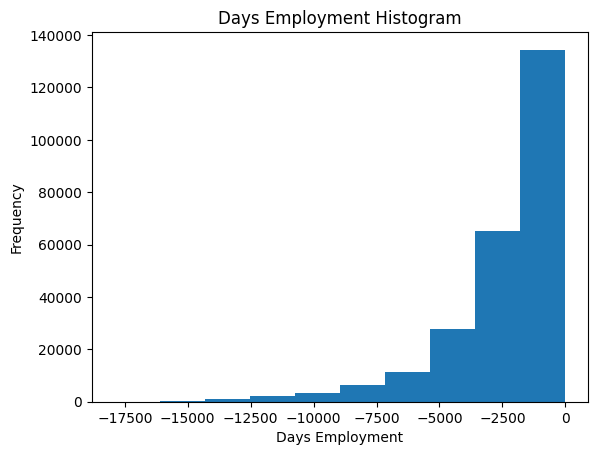

In [47]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].astype(object)
app_test['DAYS_EMPLOYED']  = app_test['DAYS_EMPLOYED'].astype(object)

app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
app_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

📊 Vérification après traitement des anomalies

La distribution obtenue est désormais **beaucoup plus conforme à ce que l’on attend**, et une **nouvelle variable** a été créée afin d’indiquer au modèle que ces valeurs étaient initialement anormales.  
Cette information est importante car les valeurs manquantes devront ensuite être **imputées**, probablement à l’aide de la **médiane** de la variable.

Les autres variables contenant `DAYS` dans le DataFrame présentent des distributions cohérentes, sans anomalies évidentes.

⚠️ **Point méthodologique crucial** : toute transformation appliquée aux données d’entraînement doit également être appliquée **de manière identique** aux données de test.  
Nous veillons donc à :
- créer la même variable indicatrice d’anomalie dans le jeu de test
- remplacer les valeurs anormales par `np.nan` dans la variable d’origine


In [49]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('On dénombre %d anomalies dans les données de test sur %d entrées' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

On dénombre 0 anomalies dans les données de test sur 48744 entrées


### Corrélation

🔗 Corrélations entre les variables et la cible

Après avoir traité les variables catégorielles et les anomalies, nous poursuivons l’**analyse exploratoire des données (EDA)**.

Une première manière d’explorer les relations entre les variables consiste à analyser les **corrélations** entre les features et la variable cible.  
Pour cela, nous calculons le **coefficient de corrélation de Pearson** entre chaque variable et la cible à l’aide de la méthode `.corr()` de pandas.

Bien que le coefficient de corrélation ne soit pas un indicateur parfait de la **pertinence** d’une variable, il permet d’identifier des **relations potentielles** au sein des données.

📏 Interprétation des coefficients de corrélation (valeur absolue)

- **0.00 – 0.19** : très faible  
- **0.20 – 0.39** : faible  
- **0.40 – 0.59** : modérée  
- **0.60 – 0.79** : forte  
- **0.80 – 1.00** : très forte


In [52]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Negati

🔍 Analyse des corrélations significatives

Examinons maintenant certaines des **corrélations les plus significatives**.  
La variable **`DAYS_BIRTH`** présente la corrélation positive la plus élevée avec la variable cible (en dehors de `TARGET`, dont la corrélation avec elle-même est naturellement égale à 1).

D’après la documentation, **`DAYS_BIRTH`** correspond à l’âge du client au moment de la demande de prêt, exprimé en **jours négatifs**.  
Bien que la corrélation soit positive, les valeurs de cette variable étant négatives, cela signifie en réalité que **plus le client est âgé, moins il est susceptible de faire défaut sur son prêt** (`TARGET = 0`).

Afin de rendre cette relation plus intuitive et plus facile à interpréter, nous prenons la **valeur absolue** de la variable.  
La corrélation devient alors **négative**, reflétant clairement la relation inverse entre l’âge du client et le risque de défaut.


#### Effet de l'âge sur le remboursement

In [55]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982692)

🎂 Relation entre l’âge du client et le remboursement du prêt

On observe une **relation linéaire négative** entre l’âge du client et la variable cible :  
**plus les clients sont âgés, plus ils ont tendance à rembourser leurs prêts dans les délais**.

Nous allons maintenant examiner cette variable plus en détail.  
Dans un premier temps, nous traçons un **histogramme de l’âge des clients**, en exprimant l’axe des abscisses en **années** afin de rendre la visualisation plus lisible et interprétable.


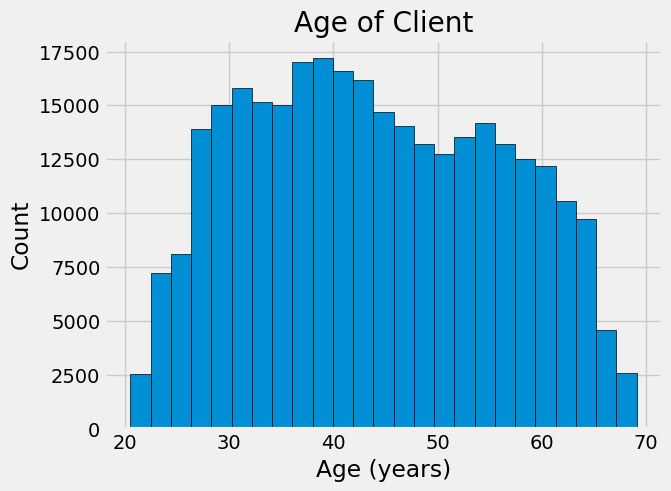

In [57]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

📈 Distribution de l’âge selon la variable cible

Pris isolément, l’histogramme de l’âge n’apporte que peu d’informations, si ce n’est que **toutes les valeurs sont cohérentes** et qu’aucune anomalie évidente n’est présente.

Afin de mieux comprendre **l’influence de l’âge sur la variable cible**, nous utilisons ensuite une **estimation de densité par noyau (Kernel Density Estimation – KDE)**, en distinguant les observations selon la valeur de la cible.

Un graphique KDE permet de représenter la **distribution d’une variable continue** sous la forme d’un histogramme lissé. Il est construit en calculant une fonction noyau (généralement gaussienne) autour de chaque observation, puis en agrégeant l’ensemble pour obtenir une courbe de densité continue.

Pour cette visualisation, nous utilisons la fonction `kdeplot` de la librairie **seaborn**.


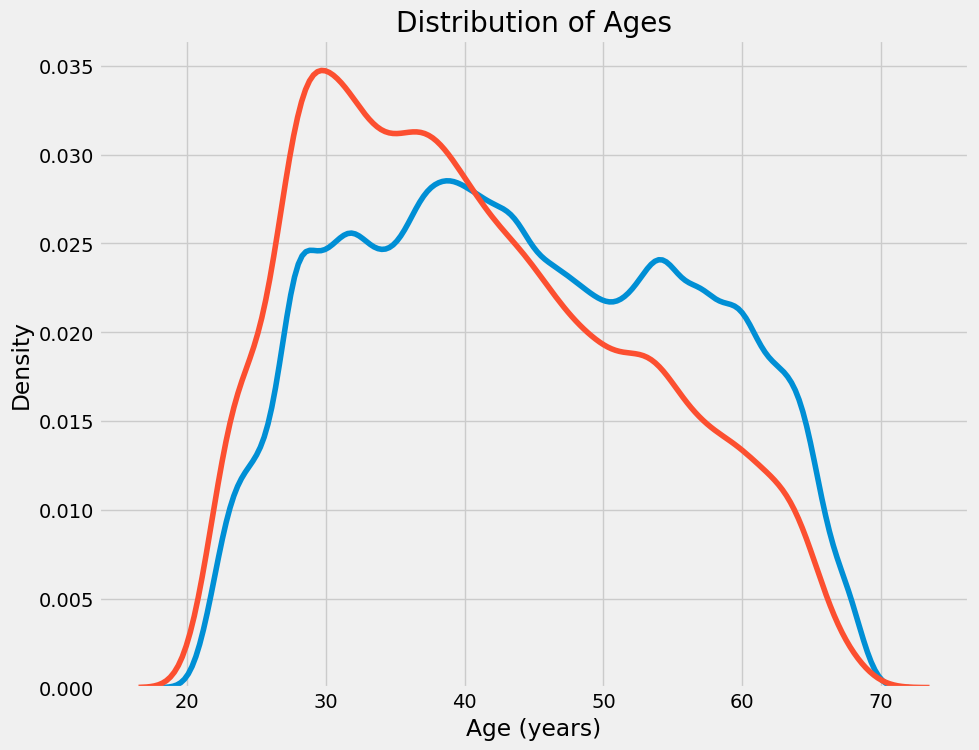

In [59]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

📉 Taux de défaut par tranche d’âge

La courbe correspondant à **`TARGET = 1`** est davantage concentrée sur les **âges les plus jeunes**, ce qui indique que les clients plus jeunes présentent un risque de défaut légèrement plus élevé.

Bien que la corrélation entre l’âge et la variable cible soit **faible** (coefficient de corrélation d’environ **-0.07**), cette variable reste **pertinente** pour un modèle de machine learning, car elle exerce tout de même une influence sur le comportement de remboursement.

Pour approfondir cette relation, nous analysons le **taux moyen de défaut par tranche d’âge**.

🧮 Méthodologie
1. L’âge est découpé en **intervalles de 5 ans**
2. Pour chaque tranche, nous calculons la **moyenne de la variable cible**, correspondant à la proportion de prêts non remboursés dans chaque catégorie d’âge

Cette approche permet de visualiser plus clairement l’évolution du risque de défaut en fonction de l’âge.


In [61]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [62]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


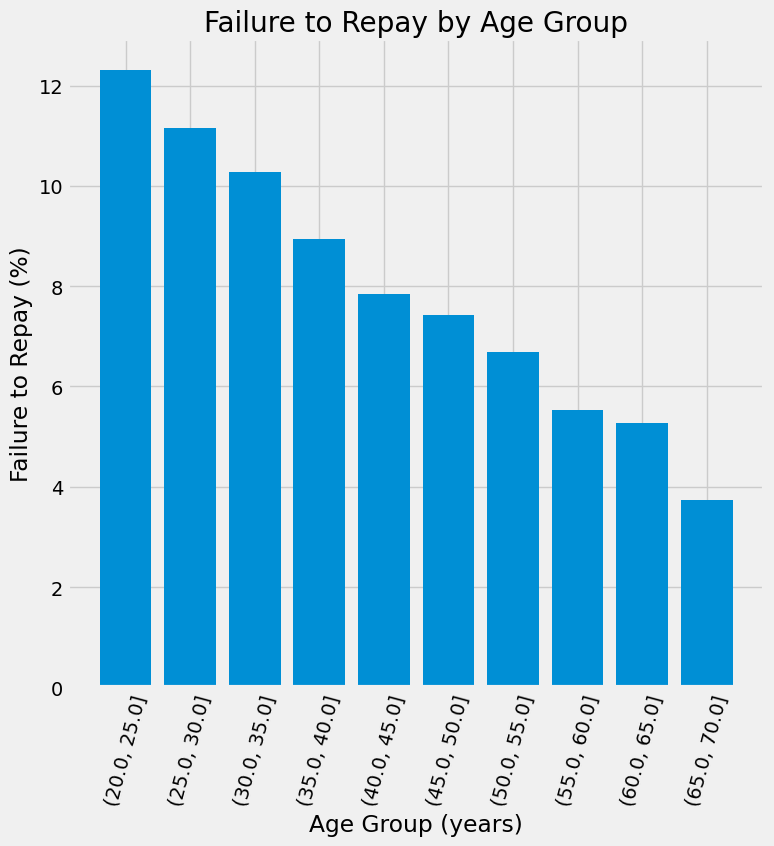

In [63]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

🧠 Interprétation des résultats – Impact de l’âge

Une **tendance nette** se dégage : les **clients les plus jeunes présentent un risque de défaut plus élevé**.  
Le taux de non-remboursement dépasse **10 %** pour les trois tranches d’âge les plus jeunes, tandis qu’il passe **sous les 5 %** pour la tranche d’âge la plus élevée.

Cette information peut être **directement exploitée par la banque**.  
Étant donné que les clients plus jeunes sont statistiquement plus susceptibles de rencontrer des difficultés de remboursement, il pourrait être pertinent de leur proposer :
- un accompagnement renforcé,
- des conseils en gestion financière,
- ou des outils d’aide à la planification budgétaire.

Il ne s’agit en aucun cas de **discriminer** les clients plus jeunes, mais plutôt de mettre en place des **mesures préventives** afin de les aider à honorer leurs échéances dans les délais.


#### Sources extérieures

🔎 Analyse des variables EXT_SOURCE

Les trois variables présentant les **corrélations négatives les plus fortes** avec la variable cible sont :
- **`EXT_SOURCE_1`**
- **`EXT_SOURCE_2`**
- **`EXT_SOURCE_3`**

D’après la documentation, ces variables correspondent à des **scores normalisés issus de sources de données externes**.  
Bien que leur définition exacte ne soit pas précisée, elles peuvent être interprétées comme une forme de **score de solvabilité**, probablement construit à partir de multiples sources d’information.

Nous allons maintenant examiner ces variables plus en détail.

🔗 Étape 1 : Analyse des corrélations
Dans un premier temps, nous visualisons :
- les **corrélations entre chaque variable `EXT_SOURCE` et la variable cible**
- les **corrélations entre les variables `EXT_SOURCE` elles-mêmes**

Cette analyse permettra de mieux comprendre leur relation avec le risque de défaut ainsi que leur éventuelle redondance.


In [67]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


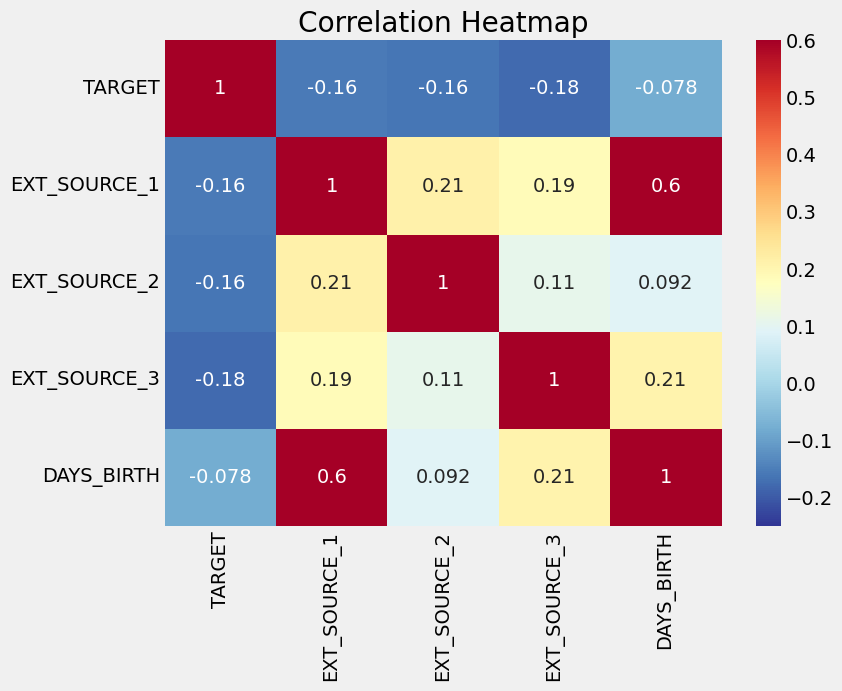

In [68]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

📊 Relation entre les variables EXT_SOURCE et la cible

Les trois variables **`EXT_SOURCE_1`**, **`EXT_SOURCE_2`** et **`EXT_SOURCE_3`** présentent toutes une **corrélation négative** avec la variable cible.  
Cela signifie que **plus la valeur du score EXT_SOURCE est élevée, plus le client est susceptible de rembourser son prêt dans les délais**.

On observe également une **corrélation positive entre `DAYS_BIRTH` et `EXT_SOURCE_1`**, ce qui suggère que l’âge du client pourrait être l’un des facteurs entrant dans le calcul de ce score externe.

Nous allons maintenant analyser la **distribution de chacune des variables `EXT_SOURCE`**, en distinguant les observations selon la valeur de la variable cible.  
Cette visualisation permettra de mieux comprendre **l’impact de ces scores sur le risque de défaut**.


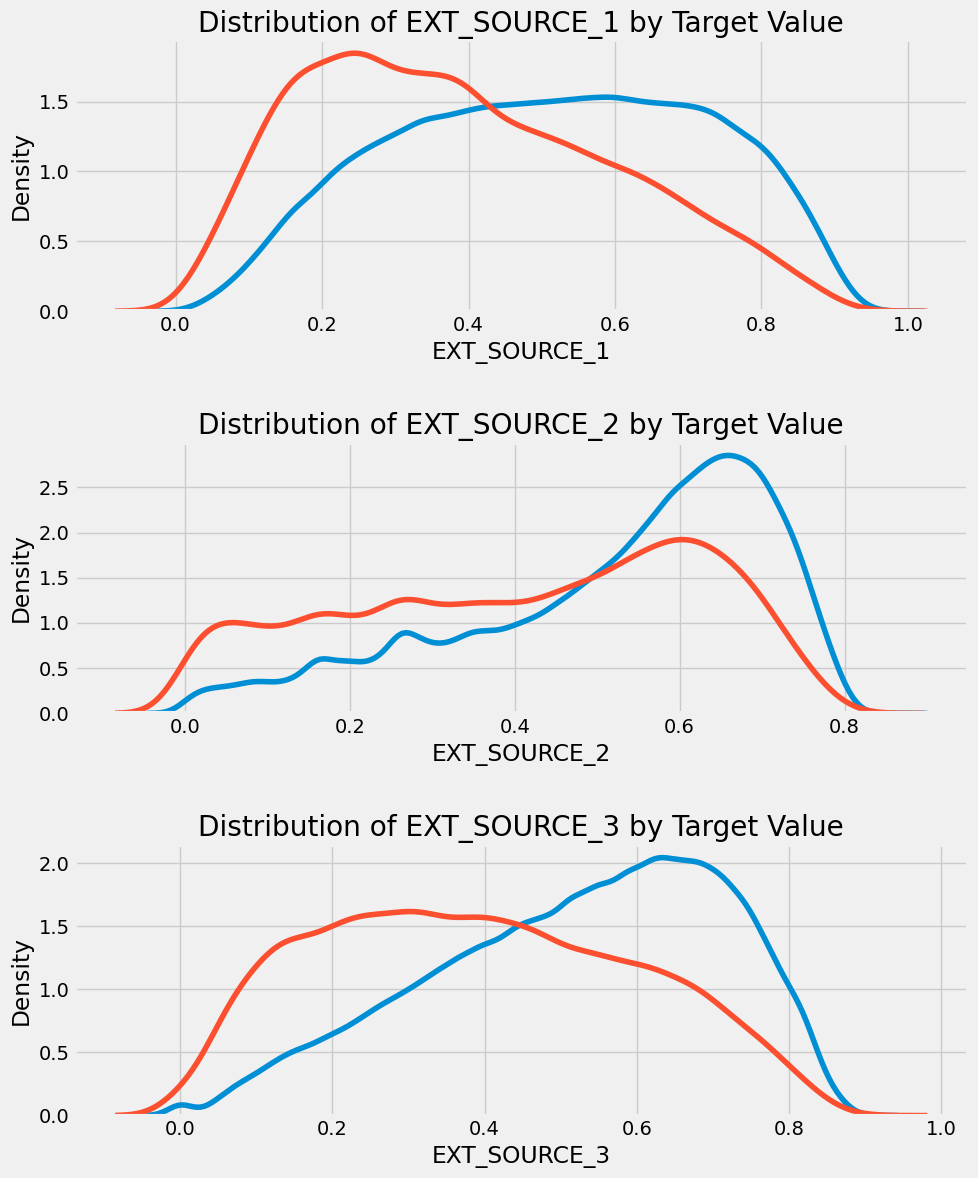

In [70]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

🧠 Interprétation – Variables EXT_SOURCE

Parmi les trois variables analysées, **`EXT_SOURCE_3`** présente la **différence la plus marquée** entre les deux valeurs de la variable cible.  
On observe ainsi une relation visible entre cette variable et la probabilité qu’un client rembourse son prêt dans les délais.

Bien que ces relations restent **faibles d’un point de vue linéaire** (elles sont toutes classées comme *très faibles* selon le coefficient de corrélation), les variables `EXT_SOURCE` demeurent **informatives**.  
Elles capturent une partie du comportement de remboursement et seront donc **utiles pour un modèle de machine learning**, en particulier dans des modèles capables de détecter des relations non linéaires.

Ces variables constituent ainsi de **bons candidats pour la phase de modélisation**.


### Pair plot

🔎 Visualisation conjointe des variables clés

Pour conclure cette analyse exploratoire, nous réalisons un **Pairs Plot** incluant les variables :
- **`EXT_SOURCE_1`**
- **`EXT_SOURCE_2`**
- **`EXT_SOURCE_3`**
- **`DAYS_BIRTH`**

Le *Pairs Plot* est un outil particulièrement efficace en EDA, car il permet :
- d’examiner les **relations entre plusieurs paires de variables**
- d’observer les **distributions individuelles** de chaque variable

Nous utilisons la librairie de visualisation **seaborn**, et plus précisément la fonction **`PairGrid`**, afin de construire un graphique comprenant :
- des **scatter plots** dans le triangle supérieur,
- des **histogrammes** sur la diagonale,
- des **estimations de densité 2D (KDE)** ainsi que les **coefficients de corrélation** dans le triangle inférieur.

Cette visualisation offre une vue d’ensemble des interactions potentielles entre les variables les plus informatives du jeu de données.


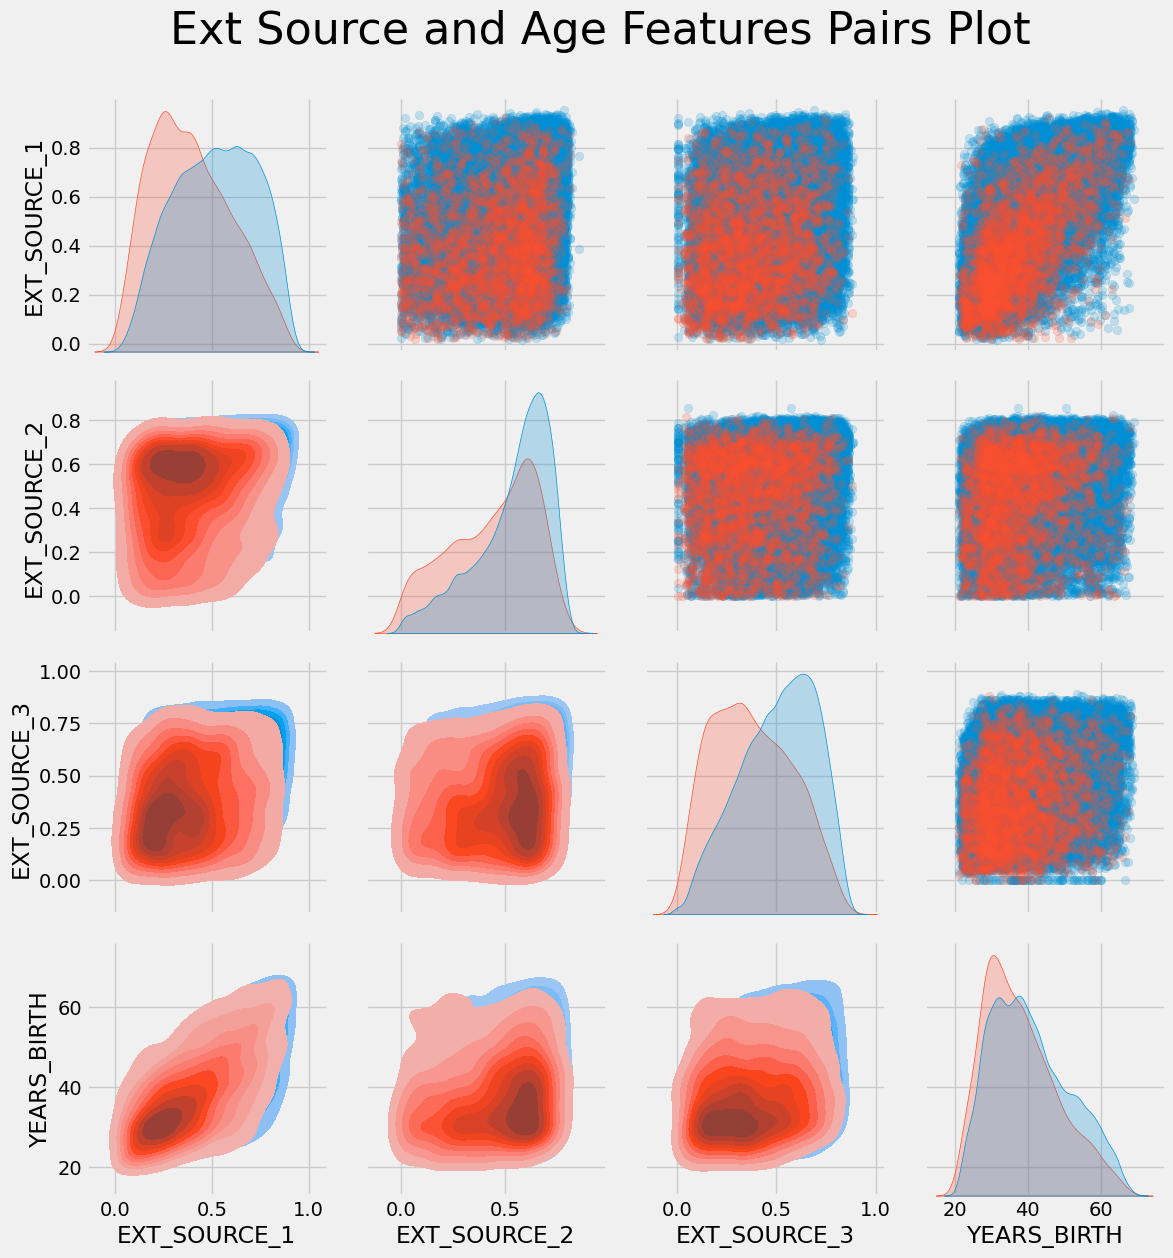

In [74]:
# Préparation des données
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]

# Helpers: compat seaborn
def _kde_kwargs_for_current_seaborn():
    """Retourne des kwargs compatibles selon la signature de sns.kdeplot."""
    sig = inspect.signature(sns.kdeplot)
    params = sig.parameters

    # fill vs shade
    kde_fill_kw = {}
    if "fill" in params:
        kde_fill_kw["fill"] = True
    elif "shade" in params:
        kde_fill_kw["shade"] = True 

    # common_norm (seaborn récent, pour éviter la courbe minoritaire écrasée)
    if "common_norm" in params:
        kde_fill_kw["common_norm"] = False

    # niveaux / seuil
    if "levels" in params:
        kde_fill_kw["levels"] = 10
    if "thresh" in params:
        kde_fill_kw["thresh"] = 0.05

    return kde_fill_kw


kde_kw = _kde_kwargs_for_current_seaborn()

# PairGrid
grid = sns.PairGrid(
    data=plot_data,
    height=3,                
    diag_sharey=False,
    hue='TARGET',
    vars=[c for c in plot_data.columns if c != 'TARGET']
)

# Haut : nuage de points
grid.map_upper(plt.scatter, alpha=0.2)

# Diagonale : KDE par classe, sans normalisation commune (si dispo)
grid.map_diag(sns.kdeplot, **{k: v for k, v in kde_kw.items() if k != "levels" and k != "thresh"})

# Bas : KDE 2D rempli
try:
    grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r, **kde_kw)
except TypeError:
    # Fallback si certains kwargs ne passent pas selon version
    safe_kw = {}
    for k in ["fill", "shade", "common_norm", "levels", "thresh"]:
        if k in kde_kw:
            safe_kw[k] = kde_kw[k]
    grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r, **safe_kw)

# Titre
plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)
plt.show()

🧩 Interprétation du Pairs Plot

Dans ce graphique :
- les points **rouges** représentent les prêts **non remboursés** (`TARGET = 1`)
- les points **bleus** représentent les prêts **remboursés** (`TARGET = 0`)

Cette visualisation permet d’observer les **différentes relations entre les variables** analysées.  
On distingue notamment une **relation linéaire positive modérée** entre **`EXT_SOURCE_1`** et **`DAYS_BIRTH`** (ou, de manière équivalente, **`YEARS_BIRTH`**).

Cela suggère que **l’âge du client pourrait être pris en compte dans le calcul du score `EXT_SOURCE_1`**, renforçant l’hypothèse selon laquelle ces variables externes intègrent plusieurs caractéristiques socio-démographiques des emprunteurs.


## Features engineering

In [77]:
# Chemin vers dossier dataset
DATA_DIR = "/Users/macbook/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk"

def load_csv(name, nrows=None):
    return pd.read_csv(os.path.join(DATA_DIR, name), nrows=nrows)

from pandas.api.types import is_string_dtype

def one_hot_encoder(df, nan_as_category=True):
    # Convert pandas string dtype -> object (sinon certaines ops groupby/agg posent problème)
    for c in df.columns:
        if is_string_dtype(df[c]):
            df[c] = df[c].astype("object")

    cat_cols = [c for c in df.columns if df[c].dtype == "object"]
    df = pd.get_dummies(df, columns=cat_cols, dummy_na=nan_as_category)
    return df

def application_base(nrows=None):
    train = load_csv("application_train.csv", nrows=nrows)
    test  = load_csv("application_test.csv", nrows=nrows)

    df = pd.concat([train, test], axis=0, ignore_index=True)
    df = df[df["CODE_GENDER"] != "XNA"] 

    # Remplacement anomalie
    df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)

    # Ratios (métier)
    df["DAYS_EMPLOYED_PERC"] = df["DAYS_EMPLOYED"] / df["DAYS_BIRTH"]
    df["INCOME_CREDIT_PERC"] = df["AMT_INCOME_TOTAL"] / df["AMT_CREDIT"]
    df["INCOME_PER_PERSON"]  = df["AMT_INCOME_TOTAL"] / df["CNT_FAM_MEMBERS"]
    df["ANNUITY_INCOME_PERC"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
    df["PAYMENT_RATE"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]

    # Encodage
    df = one_hot_encoder(df, nan_as_category=True)
    gc.collect()
    return df

### Bureau + Bureau_balance (features “actif vs clos”)

In [79]:
def bureau_and_balance(nrows=None):
    bureau = load_csv("bureau.csv", nrows=nrows)
    bb = load_csv("bureau_balance.csv", nrows=nrows)

    bb = one_hot_encoder(bb, nan_as_category=True)
    bureau = one_hot_encoder(bureau, nan_as_category=True)

   # Agrégation bb -> par SK_ID_BUREAU
    num_for_mean = [c for c in bb.columns if c not in ["SK_ID_BUREAU", "MONTHS_BALANCE"]
                and pd.api.types.is_numeric_dtype(bb[c])]

    bb_aggregations = {"MONTHS_BALANCE": ["min", "max", "size"]}
    for c in num_for_mean:
        bb_aggregations[c] = ["mean"]

    bb_agg = bb.groupby("SK_ID_BUREAU").agg(bb_aggregations)
    bb_agg.columns = [f"{a}_{b.upper()}" for a, b in bb_agg.columns]


    # Agrégation bureau -> par SK_ID_CURR (version simplifiée mais solide)
    num_cols = [c for c in bureau.columns if c not in ["SK_ID_CURR"] and bureau[c].dtype != "uint8" and bureau[c].dtype != "int8"]
    cat_cols = [c for c in bureau.columns if c not in ["SK_ID_CURR"] and (str(bureau[c].dtype).startswith("uint") or str(bureau[c].dtype).startswith("int8"))]

    num_aggs = {c: ["min", "max", "mean", "sum"] for c in num_cols}
    cat_aggs = {c: ["mean"] for c in cat_cols}

    buro_agg = bureau.groupby("SK_ID_CURR").agg({**num_aggs, **cat_aggs})
    buro_agg.columns = [f"BURO_{a}_{b.upper()}" for a, b in buro_agg.columns]

    # Actifs vs clos (si colonnes existantes)
    if "CREDIT_ACTIVE_Active" in bureau.columns:
        active = bureau[bureau["CREDIT_ACTIVE_Active"] == 1]
        active_agg = active.groupby("SK_ID_CURR").agg(num_aggs)
        active_agg.columns = [f"ACTIVE_{a}_{b.upper()}" for a, b in active_agg.columns]
        buro_agg = buro_agg.join(active_agg, how="left")

    if "CREDIT_ACTIVE_Closed" in bureau.columns:
        closed = bureau[bureau["CREDIT_ACTIVE_Closed"] == 1]
        closed_agg = closed.groupby("SK_ID_CURR").agg(num_aggs)
        closed_agg.columns = [f"CLOSED_{a}_{b.upper()}" for a, b in closed_agg.columns]
        buro_agg = buro_agg.join(closed_agg, how="left")

    del bureau, bb, bb_agg
    gc.collect()
    return buro_agg

### Previous applications (approved/refused) + ratio APP_CREDIT_PERC

In [81]:
def previous_applications(nrows=None):
    prev = load_csv("previous_application.csv", nrows=nrows)
    prev = one_hot_encoder(prev, nan_as_category=True)

    for c in ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]:
        if c in prev.columns:
            prev[c].replace(365243, np.nan, inplace=True)

    prev["APP_CREDIT_PERC"] = prev["AMT_APPLICATION"] / prev["AMT_CREDIT"]

    # Aggs
    num_cols = ["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","APP_CREDIT_PERC","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","DAYS_DECISION","CNT_PAYMENT"]
    num_cols = [c for c in num_cols if c in prev.columns]
    num_aggs = {c: ["min","max","mean"] for c in num_cols}
    if "APP_CREDIT_PERC" in num_aggs:
        num_aggs["APP_CREDIT_PERC"] = ["min","max","mean","var"]

    cat_cols = [c for c in prev.columns if c not in ["SK_ID_CURR","SK_ID_PREV"] + num_cols and prev[c].dtype in [np.uint8, np.int8, np.int16, np.int32, np.int64]]
    cat_aggs = {c: ["mean"] for c in cat_cols}

    prev_agg = prev.groupby("SK_ID_CURR").agg({**num_aggs, **cat_aggs})
    prev_agg.columns = [f"PREV_{a}_{b.upper()}" for a, b in prev_agg.columns]

    # Approved vs Refused (si dummies existent)
    if "NAME_CONTRACT_STATUS_Approved" in prev.columns:
        approved = prev[prev["NAME_CONTRACT_STATUS_Approved"] == 1]
        approved_agg = approved.groupby("SK_ID_CURR").agg(num_aggs)
        approved_agg.columns = [f"APPROVED_{a}_{b.upper()}" for a, b in approved_agg.columns]
        prev_agg = prev_agg.join(approved_agg, how="left")

    if "NAME_CONTRACT_STATUS_Refused" in prev.columns:
        refused = prev[prev["NAME_CONTRACT_STATUS_Refused"] == 1]
        refused_agg = refused.groupby("SK_ID_CURR").agg(num_aggs)
        refused_agg.columns = [f"REFUSED_{a}_{b.upper()}" for a, b in refused_agg.columns]
        prev_agg = prev_agg.join(refused_agg, how="left")

    del prev
    gc.collect()
    return prev_agg

### POS / Installments / Credit card (très utiles en scoring)

In [83]:
def pos_cash(nrows=None):
    pos = load_csv("POS_CASH_balance.csv", nrows=nrows)
    pos = one_hot_encoder(pos, nan_as_category=True)

    aggs = {
        "MONTHS_BALANCE": ["max","mean","size"],
        "SK_DPD": ["max","mean"],
        "SK_DPD_DEF": ["max","mean"]
    }
    pos_agg = pos.groupby("SK_ID_CURR").agg(aggs)
    pos_agg.columns = [f"POS_{a}_{b.upper()}" for a, b in pos_agg.columns]
    pos_agg["POS_COUNT"] = pos.groupby("SK_ID_CURR").size()
    del pos
    gc.collect()
    return pos_agg


def installments_payments(nrows=None):
    ins = load_csv("installments_payments.csv", nrows=nrows)
    ins = one_hot_encoder(ins, nan_as_category=True)

    ins["PAYMENT_PERC"] = ins["AMT_PAYMENT"] / ins["AMT_INSTALMENT"]
    ins["PAYMENT_DIFF"] = ins["AMT_INSTALMENT"] - ins["AMT_PAYMENT"]
    ins["DPD"] = (ins["DAYS_ENTRY_PAYMENT"] - ins["DAYS_INSTALMENT"]).clip(lower=0)
    ins["DBD"] = (ins["DAYS_INSTALMENT"] - ins["DAYS_ENTRY_PAYMENT"]).clip(lower=0)

    aggs = {
        "DPD": ["max","mean","sum"],
        "DBD": ["max","mean","sum"],
        "PAYMENT_PERC": ["max","mean","var"],
        "PAYMENT_DIFF": ["max","mean","sum","var"],
        "AMT_INSTALMENT": ["max","mean","sum"],
        "AMT_PAYMENT": ["min","max","mean","sum"],
    }
    ins_agg = ins.groupby("SK_ID_CURR").agg(aggs)
    ins_agg.columns = [f"INSTAL_{a}_{b.upper()}" for a, b in ins_agg.columns]
    ins_agg["INSTAL_COUNT"] = ins.groupby("SK_ID_CURR").size()

    del ins
    gc.collect()
    return ins_agg


def credit_card_balance(nrows=None):
    cc = load_csv("credit_card_balance.csv", nrows=nrows)
    cc = one_hot_encoder(cc, nan_as_category=True)

    if "SK_ID_PREV" in cc.columns:
        cc.drop(columns=["SK_ID_PREV"], inplace=True)

    cc_agg = cc.groupby("SK_ID_CURR").agg(["min","max","mean","sum"])
    cc_agg.columns = [f"CC_{a}_{b.upper()}" for a, b in cc_agg.columns]
    cc_agg["CC_COUNT"] = cc.groupby("SK_ID_CURR").size()

    del cc
    gc.collect()
    return cc_agg

### Construire le dataset final

In [85]:
def build_features(nrows=None):
    df = application_base(nrows=nrows)

    buro = bureau_and_balance(nrows=nrows)
    df = df.merge(buro, on="SK_ID_CURR", how="left")
    del buro; gc.collect()

    prev = previous_applications(nrows=nrows)
    df = df.merge(prev, on="SK_ID_CURR", how="left")
    del prev; gc.collect()

    pos = pos_cash(nrows=nrows)
    df = df.merge(pos, on="SK_ID_CURR", how="left")
    del pos; gc.collect()

    ins = installments_payments(nrows=nrows)
    df = df.merge(ins, on="SK_ID_CURR", how="left")
    del ins; gc.collect()

    cc = credit_card_balance(nrows=nrows)
    df = df.merge(cc, on="SK_ID_CURR", how="left")
    del cc; gc.collect()

    return df

df = build_features(nrows=None)
print(df.shape)

(356251, 954)


### Split back train/test

In [87]:
train_df = df[df["TARGET"].notnull()].copy()
test_df  = df[df["TARGET"].isnull()].copy()

y = train_df["TARGET"].astype(int)
X = train_df.drop(columns=["TARGET"])
X_test = test_df.drop(columns=["TARGET"])

print(X.shape, X_test.shape, y.shape)

(307507, 953) (48744, 953) (307507,)


## Pipeline preprocess 

In [89]:
# Séparer les types
num_cols = X.columns[X.dtypes != "uint8"].tolist()
cat_cols = X.columns[X.dtypes == "uint8"].tolist()

# Transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

In [90]:
num = X.select_dtypes(include=[np.number])
bad_cols = num.columns[np.isinf(num).any()].tolist()
print("Colonnes avec inf :", bad_cols[:30])
print("Nb colonnes concernées :", len(bad_cols))

Colonnes avec inf : ['PREV_APP_CREDIT_PERC_MAX', 'PREV_APP_CREDIT_PERC_MEAN', 'REFUSED_APP_CREDIT_PERC_MAX', 'REFUSED_APP_CREDIT_PERC_MEAN', 'INSTAL_PAYMENT_PERC_MAX', 'INSTAL_PAYMENT_PERC_MEAN']
Nb colonnes concernées : 6


In [91]:
# Remplacer inf/-inf par NaN
X = X.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# vérifier combien il y en avait
print("Inf dans X :", np.isinf(X.select_dtypes(include=[np.number])).sum().sum())
print("Inf dans X_test :", np.isinf(X_test.select_dtypes(include=[np.number])).sum().sum())

Inf dans X : 0
Inf dans X_test : 0


### Matrices X

In [93]:
X_train_matrix = preprocess.fit_transform(X)
X_test_matrix  = preprocess.transform(X_test)

print(X_train_matrix.shape)
print(X_test_matrix.shape)

(307507, 953)
(48744, 953)


In [94]:
print(type(X_train_matrix))
print(X_train_matrix.shape)
print(X_test_matrix.shape)

assert X_train_matrix.shape[1] == X_test_matrix.shape[1]

<class 'numpy.ndarray'>
(307507, 953)
(48744, 953)


## Création de la métrique métier

### Fonctions : coût métier + recherche du meilleur seuil

In [97]:
def _proba_class1(y_proba):
    """
    Assure un vecteur (n_samples,) = proba de la classe 1.
    GridSearch/make_scorer peut passer (n,2) ou (n,).
    """
    y_proba = np.asarray(y_proba)
    if y_proba.ndim == 2:
        y_proba = y_proba[:, 1]
    return y_proba

def business_cost_from_proba(y_true, y_proba, threshold, fn_weight=10, fp_weight=1):
    y_proba = _proba_class1(y_proba)

    # Sécurité: remplace inf/-inf par NaN 
    y_proba = np.where(np.isfinite(y_proba), y_proba, np.nan)

    y_pred = (y_proba >= threshold).astype(int)

    # IMPORTANT: force une matrice 2x2 même si une classe est absente
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    return fn_weight * fn + fp_weight * fp

def find_best_threshold(y_true, y_proba, fn_weight=10, fp_weight=1, thresholds=None):
    """
    Cherche le seuil qui MINIMISE le coût (sur le fold).
    Retourne: best_threshold, min_cost
    """
    y_proba = _proba_class1(y_proba)

    if thresholds is None:
        thresholds = np.linspace(0.0, 1.0, 201)  # 201 suffit (plus rapide que 501)

    costs = np.array([
        business_cost_from_proba(y_true, y_proba, t, fn_weight, fp_weight)
        for t in thresholds
    ], dtype=float)

    best_idx = np.nanargmin(costs)  # ignore NaN si jamais il y en avait
    return float(thresholds[best_idx]), float(costs[best_idx])

In [98]:
def business_scorer_callable(estimator, X_fold, y_fold):
    """
    Score métier = - (10*FN + FP)
    sklearn va appeler cette fonction automatiquement
    """
    # Proba de défaut (classe 1)
    y_proba = estimator.predict_proba(X_fold)[:, 1]

    # On cherche le seuil qui MINIMISE le coût sur ce fold
    _, min_cost = find_best_threshold(
        y_fold,
        y_proba,
        fn_weight=10,
        fp_weight=1
    )

    return -min_cost  # GridSearch maximise


def threshold_scorer_callable(estimator, X_fold, y_fold):
    """
    Sert uniquement à récupérer le seuil métier moyen
    """
    y_proba = estimator.predict_proba(X_fold)[:, 1]

    best_t, _ = find_best_threshold(
        y_fold,
        y_proba,
        fn_weight=10,
        fp_weight=1
    )

    return best_t


### Scorers sklearn : “score métier” + “seuil métier”

In [100]:
def business_score_to_maximize(y_true, y_proba):
    best_t, min_cost = find_best_threshold(y_true, y_proba, fn_weight=10, fp_weight=1)
    return -min_cost  # GridSearch maximise

def threshold_score(y_true, y_proba):
    best_t, _ = find_best_threshold(y_true, y_proba, fn_weight=10, fp_weight=1)
    return best_t


## Modèles supervisés

### Random forest

#### Sous-échantillon stratifié (50k) + float32 (accélère)

In [104]:
X_sub, _, y_sub, _ = train_test_split(
    X_train_matrix, y,
    train_size=50000,
    stratify=y,
    random_state=42
)

# accélération mémoire/CPU
X_sub = X_sub.astype("float32", copy=False)

#### RandomizedSearchCV compact (8 essais × 3 folds = 24 fits)

In [106]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    bootstrap=True,
    max_samples=0.5,   
)

param_dist = {
    "n_estimators": [100, 200, 400],
    "max_depth": [10, 12, 16, None],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 10],
    "max_features": ["sqrt", 0.5],
}

scoring = {
    "business": business_scorer_callable,
    "threshold": threshold_scorer_callable,
    "auc": "roc_auc",
    "accuracy": "accuracy",
}


search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    scoring=scoring,
    refit="business",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=False,
    error_score="raise"
)


search_rf.fit(X_sub, y_sub)

best_rf = search_rf.best_estimator_
best_idx = search_rf.best_index_

print("Best params:", search_rf.best_params_)
print("Coût métier moyen (CV):", -search_rf.best_score_)
print("Seuil métier moyen (CV):", search_rf.cv_results_["mean_test_threshold"][best_idx])
print("AUC (mean CV):", search_rf.cv_results_["mean_test_auc"][best_idx])
print("Accuracy (mean CV):", search_rf.cv_results_["mean_test_accuracy"][best_idx])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=  33.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=  34.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=  34.5s
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 16}
Coût métier moyen (CV): 9037.0
Seuil métier moyen (CV): 0.24
AUC (mean CV): 0.7451831633479844
Accuracy (mean CV): 0.8922800015138543


#### Validation au seuil métier

In [108]:
# Split validation (sur le sous-échantillon, rapide et illustratif)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub,
    test_size=0.2,
    stratify=y_sub,
    random_state=42
)

# Refit du best RF sur train split
best_rf = best_rf  # déjà récupéré
best_rf.fit(X_tr, y_tr)

# Probas + AUC
y_val_proba = best_rf.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(y_val, y_val_proba)

# Seuil métier (issu du CV)
threshold_business = 0.21333333333333335 

y_val_pred = (y_val_proba >= threshold_business).astype(int)

tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred, labels=[0, 1]).ravel()

cost = 10*fn + fp

print("=== Validation au seuil métier ===")
print(f"AUC (val) : {auc_val:.4f}")
print(f"Seuil métier : {threshold_business:.3f}")
print("TN, FP, FN, TP =", tn, fp, fn, tp)
print(f"Coût métier (val) = 10*FN + FP = {10*fn} + {fp} = {cost}")

print("\nMatrice de confusion :")
print(confusion_matrix(y_val, y_val_pred, labels=[0, 1]))

print("\nRapport de classification :")
print(classification_report(y_val, y_val_pred, digits=4))

=== Validation au seuil métier ===
AUC (val) : 0.7520
Seuil métier : 0.213
TN, FP, FN, TP = 6381 2812 257 550
Coût métier (val) = 10*FN + FP = 2570 + 2812 = 5382

Matrice de confusion :
[[6381 2812]
 [ 257  550]]

Rapport de classification :
              precision    recall  f1-score   support

           0     0.9613    0.6941    0.8061      9193
           1     0.1636    0.6815    0.2639       807

    accuracy                         0.6931     10000
   macro avg     0.5624    0.6878    0.5350     10000
weighted avg     0.8969    0.6931    0.7624     10000



#### Comparaison différents seuils

In [110]:
def summarize_thresholds(y_true, y_proba, thresholds):
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
        cost = 10*fn + fp
        rows.append({"threshold": t, "FN": fn, "FP": fp, "cost(10FN+FP)": cost})
    return pd.DataFrame(rows).sort_values("cost(10FN+FP)")

thresholds_to_compare = [0.10, 0.15, 0.213, 0.25, 0.30, 0.40]
display(summarize_thresholds(y_val, y_val_proba, thresholds_to_compare))

,threshold,FN,FP,cost(10FN+FP)
2,0.213,256,2824,5384
3,0.250,316,2293,5453
4,0.300,385,1692,5542
1,0.150,151,4166,5676
5,0.400,495,920,5870
0,0.100,71,5856,6566


#### Matrice de confusion

=== Résultats RandomForest au seuil métier ===
Seuil métier : 0.213
TN=6381, FP=2812, FN=257, TP=550
Coût métier = 10*FN + FP = 2570 + 2812 = 5382

Rapport de classification :
              precision    recall  f1-score   support

           0     0.9613    0.6941    0.8061      9193
           1     0.1636    0.6815    0.2639       807

    accuracy                         0.6931     10000
   macro avg     0.5624    0.6878    0.5350     10000
weighted avg     0.8969    0.6931    0.7624     10000



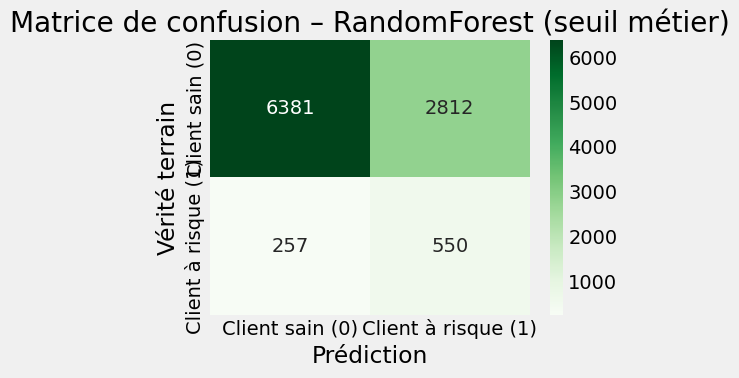

In [112]:
#  Split validation  
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub,
    test_size=0.2,
    stratify=y_sub,
    random_state=42
)

# Refit du meilleur RandomForest 
best_rf.fit(X_tr, y_tr)

# Probabilités 
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

#  Application du seuil métier RF 
threshold_rf = 0.21333333333333335  
y_val_pred = (y_val_proba >= threshold_rf).astype(int)

#  Matrice de confusion 
cm_rf = confusion_matrix(y_val, y_val_pred, labels=[0, 1])
tn, fp, fn, tp = cm_rf.ravel()

# Coût métier 
cost_rf = 10 * fn + fp

print("=== Résultats RandomForest au seuil métier ===")
print(f"Seuil métier : {threshold_rf:.3f}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Coût métier = 10*FN + FP = {10*fn} + {fp} = {cost_rf}\n")

print("Rapport de classification :")
print(classification_report(y_val, y_val_pred, digits=4))

#  Heatmap 
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Client sain (0)", "Client à risque (1)"],
    yticklabels=["Client sain (0)", "Client à risque (1)"]
)
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion – RandomForest (seuil métier)")
plt.tight_layout()
plt.show()


### LightGBM

#### Test

In [115]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42
)

lgbm_quick = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

lgbm_quick.fit(X_tr, y_tr)

print("✅ business:", business_scorer_callable(lgbm_quick, X_val, y_val))
print("✅ threshold:", threshold_scorer_callable(lgbm_quick, X_val, y_val))

[LightGBM] [Info] Number of positive: 3229, number of negative: 36771
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84597
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 694
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
✅ business: -5062.0
✅ threshold: 0.38


#### RandomizedSearchCV

In [117]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lgbm = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

param_dist_lgbm = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.02, 0.03, 0.05],
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 8, 12],
    "min_child_samples": [20, 50, 100],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=5,               
    scoring=scoring,        
    refit="business",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score="raise"
)

search_lgbm.fit(X_sub, y_sub)

best_lgbm = search_lgbm.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 2690, number of negative: 30643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.463438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83648
[LightGBM] [Info] Number of data points in the train set: 33333, number of used features: 685
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=12, min_child_samples=20, n_estimators=300, num_leaves=31, subsample=0.8; total time=  39.2s
[LightGBM] [Info] Number of positive: 2691, number of negative: 30642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.432659 seconds.
You can set `force_row_wise=true` to remove the overhea

In [118]:
best_idx = search_lgbm.best_index_

print("Best params:", search_lgbm.best_params_)
print("Coût métier moyen (CV):", -search_lgbm.best_score_)
print("Seuil métier moyen (CV):", search_lgbm.cv_results_["mean_test_threshold"][best_idx])
print("AUC (mean CV):", search_lgbm.cv_results_["mean_test_auc"][best_idx])
print("Accuracy (mean CV):", search_lgbm.cv_results_["mean_test_accuracy"][best_idx])

Best params: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 12, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
Coût métier moyen (CV): 8565.666666666666
Seuil métier moyen (CV): 0.40166666666666667
AUC (mean CV): 0.7658735148808233
Accuracy (mean CV): 0.7929600042344527


#### Matrice de confusion 

[LightGBM] [Info] Number of positive: 3229, number of negative: 36771
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84597
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 694
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
=== Résultats au seuil métier ===
Seuil métier : 0.398
TN=6380, FP=2813, FN=240, TP=567
Coût métier = 10*FN + FP = 2400 + 2813 = 5213

Rapport de classification :
              precision    recall  f1-score   support

           0     0.9637    0.6940    0.8069      9193
           1     0.1678    0.7026    0.2708       807

    accuracy                         0.6947     10000
   macro avg     0.5657    0.6983    0.5389     10000
weighted avg     0.8995    0.6947    0.7637     10000



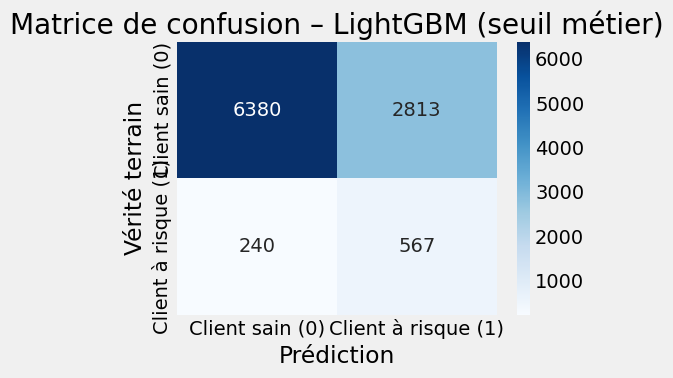

In [120]:
# Split validation 
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub,
    test_size=0.2,
    stratify=y_sub,
    random_state=42
)

#  Refit du meilleur LightGBM 
best_lgbm.fit(X_tr, y_tr)

#  Probabilités 
y_val_proba = best_lgbm.predict_proba(X_val)[:, 1]

#  Application du seuil métier 
threshold_business = 0.3983333333333334  
y_val_pred = (y_val_proba >= threshold_business).astype(int)

#  Matrice de confusion 
cm = confusion_matrix(y_val, y_val_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()

#  Coût métier 
cost = 10 * fn + fp

print("=== Résultats au seuil métier ===")
print(f"Seuil métier : {threshold_business:.3f}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Coût métier = 10*FN + FP = {10*fn} + {fp} = {cost}\n")

print("Rapport de classification :")
print(classification_report(y_val, y_val_pred, digits=4))

#  Heatmap 
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Client sain (0)", "Client à risque (1)"],
    yticklabels=["Client sain (0)", "Client à risque (1)"]
)
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion – LightGBM (seuil métier)")
plt.tight_layout()
plt.show()

### XGBoost

#### Test

In [123]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42
)

xgb_quick = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb_quick.fit(X_tr, y_tr)

print("✅ business:", business_scorer_callable(xgb_quick, X_val, y_val))
print("✅ threshold:", threshold_scorer_callable(xgb_quick, X_val, y_val))

✅ business: -4929.0
✅ threshold: 0.085


#### XGBoost – RandomizedSearchCV

In [125]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pos = int((y_sub == 1).sum())
neg = int((y_sub == 0).sum())
scale_pos_weight = neg / max(pos, 1)

xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    tree_method="hist",     
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight
)

param_dist_xgb = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.02, 0.03, 0.05],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 5, 10],
    "reg_alpha": [0.0, 0.1, 0.5],
    "reg_lambda": [1.0, 2.0, 5.0],
}

search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=5,              
    scoring=scoring,       
    refit="business",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score="raise"
)

search_xgb.fit(X_sub, y_sub)

best_xgb = search_xgb.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [126]:
best_idx = search_xgb.best_index_

print("Best params:", search_xgb.best_params_)
print("Coût métier moyen (CV):", -search_xgb.best_score_)
print("Seuil métier moyen (CV):", search_xgb.cv_results_["mean_test_threshold"][best_idx])
print("AUC (mean CV):", search_xgb.cv_results_["mean_test_auc"][best_idx])
print("Accuracy (mean CV):", search_xgb.cv_results_["mean_test_accuracy"][best_idx])

Best params: {'subsample': 0.8, 'reg_lambda': 5.0, 'reg_alpha': 0.5, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
Coût métier moyen (CV): 8777.0
Seuil métier moyen (CV): 0.085
AUC (mean CV): 0.7573103650778489
Accuracy (mean CV): 0.9078600271268306


#### Matrice de confusion

=== Résultats XGBoost au seuil métier ===
Seuil métier : 0.088
TN=6386, FP=2807, FN=234, TP=573
Coût métier = 10*FN + FP = 2340 + 2807 = 5147

Rapport de classification :
              precision    recall  f1-score   support

           0     0.9647    0.6947    0.8077      9193
           1     0.1695    0.7100    0.2737       807

    accuracy                         0.6959     10000
   macro avg     0.5671    0.7023    0.5407     10000
weighted avg     0.9005    0.6959    0.7646     10000



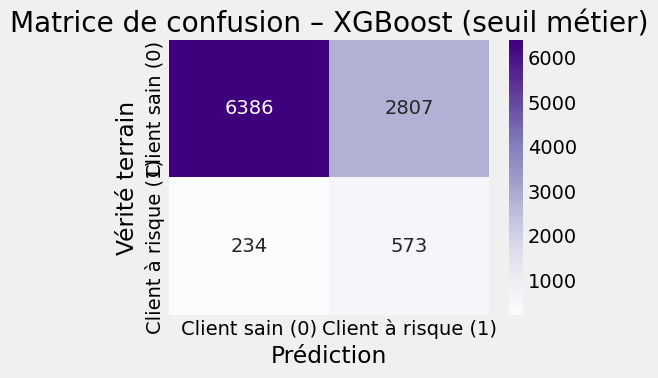

In [128]:
# Split validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub,
    test_size=0.2,
    stratify=y_sub,
    random_state=42
)

# Refit du meilleur XGBoost 
best_xgb.fit(X_tr, y_tr)

# Probabilités 
y_val_proba = best_xgb.predict_proba(X_val)[:, 1]

# Application du seuil métier
threshold_xgb = 0.08833333333333333 
y_val_pred = (y_val_proba >= threshold_xgb).astype(int)

# Matrice de confusion
cm_xgb = confusion_matrix(y_val, y_val_pred, labels=[0, 1])
tn, fp, fn, tp = cm_xgb.ravel()

# Coût métier
cost_xgb = 10 * fn + fp

print("=== Résultats XGBoost au seuil métier ===")
print(f"Seuil métier : {threshold_xgb:.3f}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Coût métier = 10*FN + FP = {10*fn} + {fp} = {cost_xgb}\n")

print("Rapport de classification :")
print(classification_report(y_val, y_val_pred, digits=4))

# Heatmap 
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Client sain (0)", "Client à risque (1)"],
    yticklabels=["Client sain (0)", "Client à risque (1)"]
)
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion – XGBoost (seuil métier)")
plt.tight_layout()
plt.show()


#### Branchement dans ML Flow

In [204]:
from sklearn.metrics import roc_auc_score, accuracy_score
import mlflow
import mlflow.sklearn
import time

# (au cas où) s'assurer qu'on log bien sur ton serveur
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("projet7-credit-scoring")

run_name = f"XGBoost_final_{time.strftime('%Y%m%d-%H%M%S')}"

with mlflow.start_run(run_name=run_name):

    # --- métriques ---
    auc = roc_auc_score(y_val, y_val_proba)
    acc = accuracy_score(y_val, y_val_pred)

    # coût métier (si variable existante)
    business_cost_value = None
    if "cost_xgb" in globals():
        business_cost_value = float(cost_xgb)

    # --- logs ---
    mlflow.log_metric("AUC", float(auc))
    mlflow.log_metric("accuracy_seuil_metier", float(acc))
    if business_cost_value is not None:
        mlflow.log_metric("business_cost", business_cost_value)

    mlflow.log_param("threshold_metier", float(threshold_xgb))
    mlflow.log_param("cost_FN", 10)
    mlflow.log_param("cost_FP", 1)

    # hyperparams (XGBoost)
    mlflow.log_params(best_xgb.get_params())

    # tags utiles
    mlflow.set_tag("model_family", "xgboost")
    mlflow.set_tag("purpose", "credit_scoring")

    # modèle + registry (SANS accent -> évite les galères CLI)
    mlflow.sklearn.log_model(
        best_xgb,
        artifact_path="model",
        registered_model_name="credit_scoring_xgboost"
    )

print("✅ Run + modèle loggés dans MLflow (UI > Experiments et Models)")


2026/02/06 12:42:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'credit_scoring_xgboost' already exists. Creating a new version of this model...
2026/02/06 12:42:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: credit_scoring_xgboost, version 2


🏃 View run XGBoost_final_20260206-124233 at: http://127.0.0.1:5000/#/experiments/1/runs/4df2f70ffc054f03807032671065ce74
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✅ Run + modèle loggés dans MLflow (UI > Experiments et Models)


Created version '2' of model 'credit_scoring_xgboost'.


#### Tester le serving MLflow

In [208]:
# X_val est un numpy array
sample = X_val[0:1]  # shape (1, n_features)
sample

array([[ 3.09296000e+05,  0.00000000e+00,  2.47500000e+05,
         4.97520000e+05,  5.91750000e+04,  4.50000000e+05,
         1.44640000e-02, -1.96540000e+04, -2.35000000e+02,
        -1.30840000e+04, -3.20100000e+03,  2.40000000e+01,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         5.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.73594155e-01,  7.52981298e-01,
         5.35276250e-01,  4.95000000e-02,  4.96000000e-02,
         9.73700000e-01,  7.55200000e-01,  2.11000000e-02,
         0.00000000e+00,  1.03400000e-01,  1.25000000e-01,
         2.08300000e-01,  4.06000000e-02,  7.56000000e-02,
         3.96000000e-02,  0.00000000e+00,  5.10000000e-03,
         5.04000000e-02,  5.14000000e-02,  9.73700000e-01,
         7.64800000e-01,  1.90000000e-02,  0.00000000e+0

In [210]:
import json

payload = {
    "inputs": sample.tolist()
}

print(json.dumps(payload))

{"inputs": [[309296.0, 0.0, 247500.0, 497520.0, 59175.0, 450000.0, 0.014464, -19654.0, -235.0, -13084.0, -3201.0, 24.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2735941552584713, 0.7529812979575626, 0.5352762504724826, 0.0495, 0.0496, 0.9737, 0.7552, 0.0211, 0.0, 0.1034, 0.125, 0.2083, 0.0406, 0.0756, 0.0396, 0.0, 0.0051, 0.0504, 0.0514, 0.9737, 0.7648, 0.019, 0.0, 0.1034, 0.125, 0.2083, 0.0415, 0.0771, 0.0413, 0.0, 0.0054, 0.05, 0.0496, 0.9737, 0.7585, 0.0208, 0.0, 0.1034, 0.125, 0.2083, 0.0413, 0.0761, 0.0404, 0.0, 0.0052, 0.0323, 0.0, 0.0, 0.0, 0.0, -1550.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.011956853566703979, 0.49746743849493485, 123750.0, 0.2390909090909091, 0.11893994211287988, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.

In [212]:
import json

# X_val est un numpy array
sample = X_val[0:1]

payload = {
    "inputs": sample.tolist()
}

with open("payload.json", "w") as f:
    json.dump(payload, f)

print("payload.json créé dans le dossier du notebook ✅")

payload.json créé dans le dossier du notebook ✅


### Logistic Regression

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix
)
import numpy as np

# Split validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_matrix,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Pipeline Logistic Regression (baseline)
logreg = Pipeline(
    steps=[
        ("scaler", StandardScaler(with_mean=False)),  # with_mean=False si sparse
        ("logreg", LogisticRegression(
            solver="lbfgs",
            max_iter=1000,
            class_weight="balanced",
            n_jobs=-1
        ))
    ]
)

logreg.fit(X_tr, y_tr)

# Probabilités
y_val_proba = logreg.predict_proba(X_val)[:, 1]

# AUC (indépendante du seuil)
auc_lr = roc_auc_score(y_val, y_val_proba)

# Recherche du seuil métier optimal
thresholds = np.linspace(0, 1, 201)
costs = []

for t in thresholds:
    y_pred = (y_val_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred, labels=[0, 1]).ravel()
    costs.append(10 * fn + fp)  # coût métier

best_idx = np.argmin(costs)
threshold_lr = thresholds[best_idx]
cost_lr = costs[best_idx]

# Accuracy au seuil métier
y_val_pred_lr = (y_val_proba >= threshold_lr).astype(int)
acc_lr = accuracy_score(y_val, y_val_pred_lr)

print("=== Logistic Regression – métriques techniques ===")
print(f"AUC : {auc_lr:.4f}")
print(f"Accuracy (au seuil métier) : {acc_lr:.4f}")
print(f"Seuil métier optimal : {threshold_lr:.3f}")
print(f"Coût métier : {cost_lr}")


=== Logistic Regression – métriques techniques ===
AUC : 0.7712
Accuracy (au seuil métier) : 0.7415
Seuil métier optimal : 0.535
Coût métier : 31259


#### Matrice de confusion 

=== Logistic Regression – Baseline ===
TN=42348, FP=14189, FN=1707, TP=3258
Coût métier = 10*FN + FP = 17070 + 14189 = 31259

              precision    recall  f1-score   support

           0     0.9613    0.7490    0.8420     56537
           1     0.1867    0.6562    0.2907      4965

    accuracy                         0.7415     61502
   macro avg     0.5740    0.7026    0.5664     61502
weighted avg     0.8987    0.7415    0.7975     61502



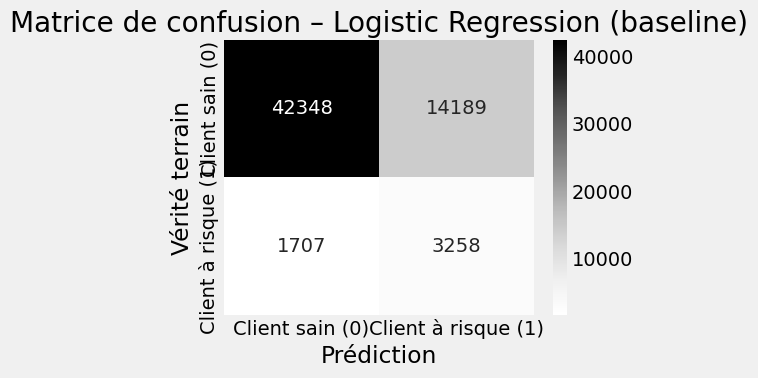

In [134]:
y_val_pred = (y_val_proba >= threshold_lr).astype(int)

cm_lr = confusion_matrix(y_val, y_val_pred, labels=[0, 1])
tn, fp, fn, tp = cm_lr.ravel()

print("=== Logistic Regression – Baseline ===")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Coût métier = 10*FN + FP = {10*fn} + {fp} = {cost_lr}\n")

print(classification_report(y_val, y_val_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Greys",
    xticklabels=["Client sain (0)", "Client à risque (1)"],
    yticklabels=["Client sain (0)", "Client à risque (1)"]
)
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion – Logistic Regression (baseline)")
plt.tight_layout()
plt.show()

### Tableau comparatif final 

In [136]:
results = [
    {
        "Modèle": "Logistic Regression (baseline)",
        "Coût métier": cost_lr,
        "Seuil métier": threshold_lr,
        "AUC": auc_lr,             
        "Accuracy": acc_lr
    },
    {
        "Modèle": "RandomForest",
        "Coût métier": cost_rf,
        "Seuil métier": threshold_rf,
        "AUC": 0.7315,
        "Accuracy": 0.9193
    },
    {
        "Modèle": "LightGBM",
        "Coût métier": 8506.0,
        "Seuil métier": 0.3983,
        "AUC": 0.7668,
        "Accuracy": 0.7939
    },
    {
        "Modèle": "XGBoost",
        "Coût métier": cost_xgb,
        "Seuil métier": threshold_xgb,
        "AUC": 0.7567,
        "Accuracy": 0.9082
    }
]

results_df = pd.DataFrame(results)

# Tri par critère métie
results_df = results_df.sort_values("Coût métier")

results_df

,Modèle,Coût métier,Seuil métier,AUC,Accuracy
3,XGBoost,5147.0,0.088333,0.756700,0.908200
1,RandomForest,5382.0,0.213333,0.731500,0.919300
2,LightGBM,8506.0,0.398300,0.766800,0.793900
0,Logistic Regression (baseline),31259.0,0.535000,0.771182,0.741537


In [137]:
results_df.style.format({
    "Coût métier": "{:.0f}",
    "Seuil métier": "{:.3f}",
    "AUC": "{:.3f}",
    "Accuracy": "{:.3f}"
})

,Modèle,Coût métier,Seuil métier,AUC,Accuracy
3,XGBoost,5147,0.088,0.757,0.908
1,RandomForest,5382,0.213,0.732,0.919
2,LightGBM,8506,0.398,0.767,0.794
0,Logistic Regression (baseline),31259,0.535,0.771,0.742
